### TO IDENTIFY THE TYPE OF PROJECT THAT WOULD BE SUCCESSFUL IF LAUNCHED IN KICKSTARTER PLATFORM 

### A CASE STUDY FOR DESSA - AI STARTUP, TORONTO

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from matplotlib.ticker import PercentFormatter
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier

from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
df = pd.read_csv('ks-projects-201801.csv',encoding='latin-1')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])
# convert to datetime format

In [4]:
df['deadline_year'] = df['deadline'].dt.year
df['launch_year'] = df['launched'].dt.year

In [5]:
df['duration'] = df['deadline'].dt.date - df['launched'].dt.date 


In [58]:
df.dropna(inplace=True)

In [59]:
df.shape

(317949, 18)

In [60]:
percent_dist = round(df["state"].value_counts() / len(df["state"]) * 100,2)
percent_dist

failed        49.63
successful    41.02
canceled       8.32
live           0.67
suspended      0.36
Name: state, dtype: float64

In [7]:
df = df[df['goal'] > 100]   # Assuming that no sound project should be <$100
df = df[df['backers'] > 0]  # Assuming that no sound project should have backers == 0
df['year'] = pd.to_datetime(df['launched']).dt.year # Add year column
df['project_duration'] = pd.to_datetime(pd.to_datetime(df['deadline']) - \
                pd.to_datetime(df['launched'])).dt.day # Determine each project duration

df = df[~df['year'].isin(['1970', '2018'])] # Exclude 1970 and 2018
df['avg_backer_invest'] = df['pledged']/df['backers']

In [42]:
percent_dist = round(df["state"].value_counts() / len(df["state"]) * 100,2)
percent_dist

failed        49.63
successful    41.02
canceled       8.32
live           0.67
suspended      0.36
Name: state, dtype: float64

In [14]:
print(f "Of the {len(df)} projects in the dataset, there are {len(df[df.duplicated(subset='id')])} which are listed more than once.")

SyntaxError: invalid syntax (<ipython-input-14-e053a2f33e95>, line 1)

In [8]:
def percent_plot(data, title):
    
    ax = data.plot(kind='bar')
    plt.title(title)
    ax.yaxis.set_major_formatter(PercentFormatter())
    plt.show();

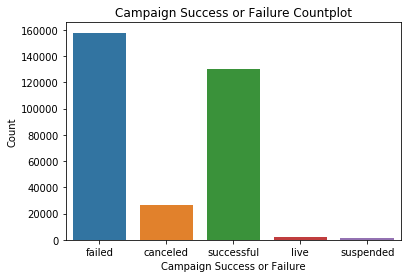

In [26]:
#figsize(8, 8)
sns.countplot(df['state']);
plt.xlabel('Campaign Success or Failure'); 
plt.ylabel('Count'); plt.title('Campaign Success or Failure Countplot');

#sns.countplot('SuccessfulBool', data=df)

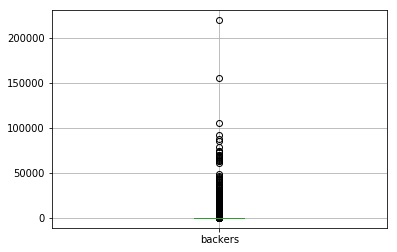

In [30]:

df.boxplot(['backers'])

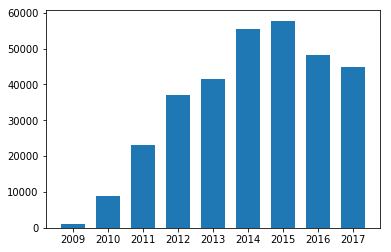

In [9]:
# Project counts by year
annual_growth = df.year.value_counts().sort_index()
index = annual_growth.index.tolist()
vals = annual_growth.tolist()

N = len(index)
ind = np.arange(N)
width = 0.7

plt.bar(ind, vals, width=width)
plt.xticks(ind, index)
plt.show()

In [21]:
p = ggplot(final,aes(V1, V2, color = final$location1))+geom_point(alpha=0.7,size=2)
p

SyntaxError: invalid syntax (<ipython-input-21-7a9bf290722e>, line 1)

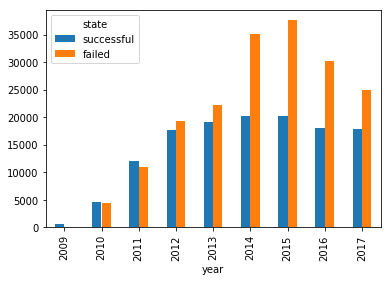

In [10]:
state_year_df = df[['year', 'state']]
state_year_df = state_year_df.pivot_table(index='year', columns='state', aggfunc=len)
state_year_df['failed'] = state_year_df['canceled'] + state_year_df['failed']+ state_year_df['suspended']
state_year_df = state_year_df[['successful', 'failed']]
state_year_df.plot.bar()
plt.show()

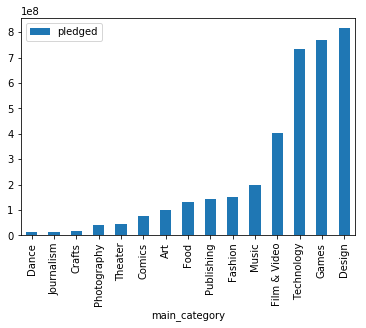

In [21]:
# Highest Pledging Categories
category_pledged_df = df[['main_category', 'pledged']].pivot_table(index='main_category', aggfunc=sum)
category_pledged_df = category_pledged_df.sort_values('pledged')
category_pledged_df.plot.bar()
plt.show()

In [6]:
df_s = df[['launch_year','main_category']]
#frequency of projects of each state in each year
df_s_ct1 = pd.crosstab(df.launch_year,df.main_category) #crosstab with count values
df_s_ct1

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
launch_year,,,,,,,,,,,,,,,
1970,1,0,0,0,1,0,2,0,0,0,1,0,1,0,1
2009,169,23,11,8,31,26,329,32,46,41,295,73,129,60,56
2010,856,266,55,169,166,173,3685,258,234,188,2466,466,705,225,607
2011,2340,590,117,413,903,603,8003,628,801,170,6615,870,2256,457,1471
2012,3433,1165,316,510,1841,1647,9398,1810,2782,278,8860,1184,5349,813,1779
2013,3440,1396,483,541,3246,2410,9535,2259,4090,209,6900,1239,5802,1826,1475
2014,5044,1582,1922,704,5394,4341,9956,6462,6008,930,7552,2376,7215,6456,1803
2015,5321,1922,2587,623,6705,5277,10202,6162,7418,1472,8550,2190,7482,9705,1684
2016,3581,1870,1773,430,5908,4123,6952,3794,6942,840,5804,1340,5665,7030,1132


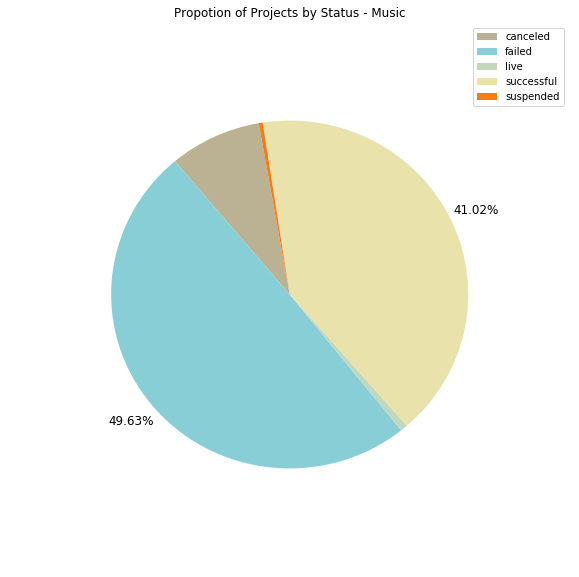

In [89]:
colors = [ '#BBB193','#88CED7', '#C1D8BF', '#E9E2AB', '#F77C11', 
          '#1C6B89', '#3A405A', '#AEC5EB', '#F9DEC9','#E9AFA3', 
          '#685044', '#9D652A', '#E8EDE4', '#3BAF8D','#28536B', 
          '#C2948A', '#7EA8BE', '#F6F0ED']
def my_autopct_ten(pct):
    if pct > 10:
        return ('%.2f' % pct + '%')
    else:
        return ''
    
with sns.color_palette(colors):
    ax=df.groupby('state').size().plot(kind='pie', labels=None,
        legend = True, pctdistance=1.15, figsize=(10,10), autopct=my_autopct_ten, shadow=False, radius=0.8,  
        fontsize=12, startangle=100, title='Propotion of Projects by Status - Music')
    ax.set_ylabel('');

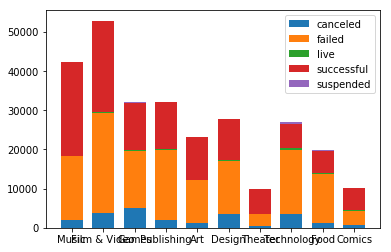

In [22]:
# Top 10 categories analysis of success and failure
subdf = df[['main_category', 'state']]
pivot = subdf.pivot_table(index='main_category', columns='state', aggfunc=len)
pivot = pivot.sort_values(by='successful', ascending=False) [:10] # Top 10 categories
attrs = pivot.index.tolist()
attr_vals = np.array(pivot.values.tolist()).T

N = len(attrs)
ind = np.arange(N)

# Stacking under each state
p1 = plt.bar(ind, attr_vals[0], width)
p2 = plt.bar(ind, attr_vals[1], width, bottom=attr_vals[0])
p3 = plt.bar(ind, attr_vals[2], width, bottom=attr_vals[0]+attr_vals[1])
p4 = plt.bar(ind, attr_vals[3], width, bottom=attr_vals[0]+attr_vals[1]+attr_vals[2])
p5 = plt.bar(ind, attr_vals[4], width, bottom=attr_vals[0]+attr_vals[1]+attr_vals[2]+attr_vals[3])

plt.legend([p1[0], p2[0], p3[0], p4[0], p5[0]], ['canceled', 'failed', 'live', 'successful', 'suspended', 'undefined'])
plt.xticks(ind, attrs)
plt.show()

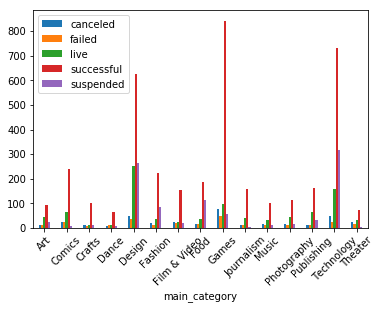

In [23]:
# Project state and Backers
backersdf = df[['main_category', 'state', 'backers']]
backers_pivot = backersdf.pivot_table(index='main_category', columns='state', aggfunc='mean')
cols = np.array(backers_pivot.columns.tolist()).T[1]
backers_pivot.plot.bar()
plt.legend(cols)
plt.xticks(rotation=45)
plt.show()

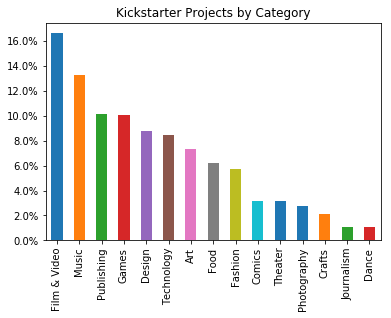

In [24]:
percent_plot((df.main_category.value_counts()/df.shape[0]*100), 
             "Kickstarter Projects by Category")

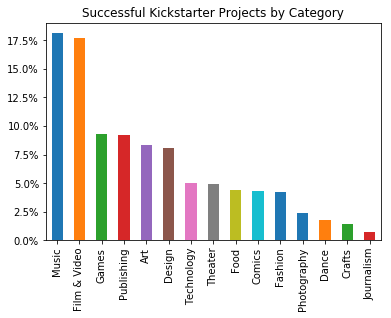

In [25]:
#categories of successful projects
percent_plot((df[df.usd_pledged_real>=df.usd_goal_real].main_category.value_counts()/
              df[df.usd_pledged_real>=df.usd_goal_real].shape[0]*100), 
              "Successful Kickstarter Projects by Category")

In [74]:
from matplotlib import cm


In [84]:
# Creating a dataframe grouped by category with columns for failed and successful
cat_df = pd.get_dummies(df.set_index('category').state).groupby('category').sum()
# Plotting
color = cm.CMRmap(np.linspace(0.1,0.8,df.category.nunique()))
df.groupby('category').category.count().plot(kind='bar', ax=ax1, color=color)
ax1.set_title('Number of projects')
ax1.set_xlabel('')
fig.subplots_adjust(hspace=0.6)
plt.show()

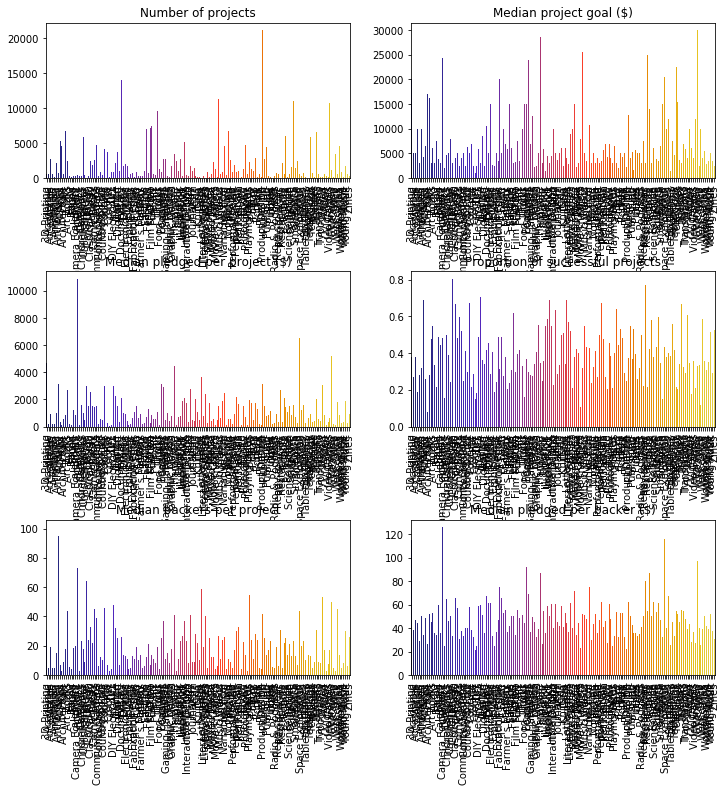

In [80]:
# Creating a dataframe grouped by category with columns for failed and successful
cat_df = pd.get_dummies(df.set_index('category').state).groupby('category').sum()
# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12,12))
color = cm.CMRmap(np.linspace(0.1,0.8,df.category.nunique()))
df.groupby('category').category.count().plot(kind='bar', ax=ax1, color=color)
ax1.set_title('Number of projects')
ax1.set_xlabel('')
df.groupby('category').usd_goal_real.median().plot(kind='bar', ax=ax2, color=color)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')
df.groupby('category').usd_pledged_real.median().plot(kind='bar', ax=ax3, color=color)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')
cat_df.div(cat_df.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax4, color=color) # Normalizes counts across rows
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')
df.groupby('category').backers.median().plot(kind='bar', ax=ax5, color=color)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')
df.groupby('category').pledge_per_backer.median().plot(kind='bar', ax=ax6, color=color)
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')
fig.subplots_adjust(hspace=0.6)
plt.show()

Text(0.5,0,'country')

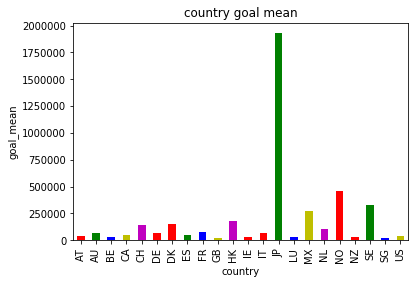

In [8]:
color = ['r', 'g', 'b', 'y', 'm']
df.groupby('country').goal.mean().sort_index().plot(kind = 'bar', color = color)
plt.title('country goal mean')
plt.ylabel('goal_mean')
plt.xlabel('country')

Text(0.5,0,'country')

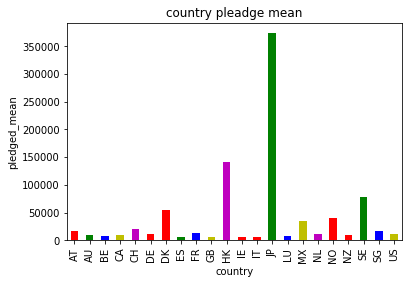

In [9]:
color = ['r', 'g', 'b', 'y', 'm']
df.groupby('country').pledged.mean().sort_index().plot(kind = 'bar', color = color)
plt.title('country pleadge mean')
plt.ylabel('pledged_mean')
plt.xlabel('country')

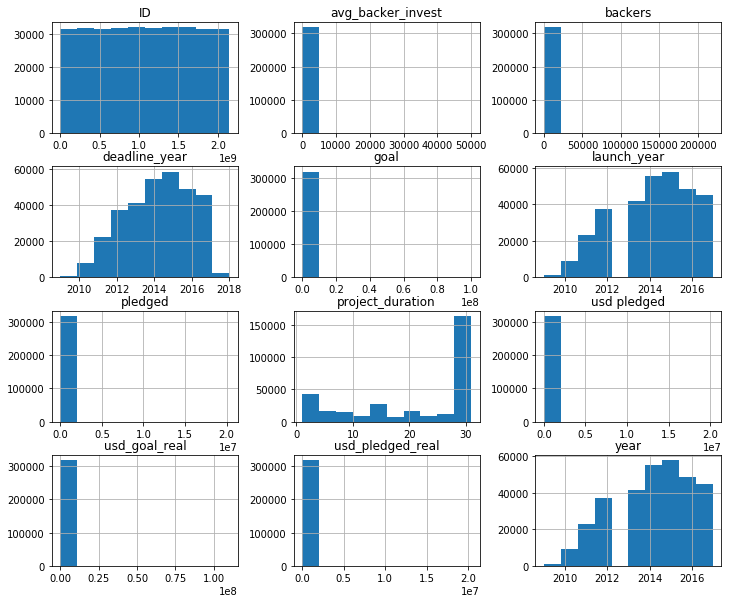

In [10]:
df[df.describe().columns].hist(figsize=(12,10));

In [13]:
print("Average amount pledged per project in each year, in $:")
print(round(df.set_index('launched').usd_pledged_real.resample('YS').mean(),2))

Average amount pledged per project in each year, in $:
launched
2009-01-01     2603.86
2010-01-01     3300.78
2011-01-01     4484.44
2012-01-01     8689.81
2013-01-01    11517.05
2014-01-01     9379.90
2015-01-01    11810.65
2016-01-01    13555.42
2017-01-01    13884.75
Freq: AS-JAN, Name: usd_pledged_real, dtype: float64


In [ ]:
ksdata$length <- interval(ymd_hms(ksdata$launched), ymd(ksdata$deadline)) %/% days(1)

length.pct <- ksdata %>%
  filter(state %in% c("successful", "failed"), length <= 61) %>%
  group_by(length, state) %>%
  summarize(count=n()) %>%
  mutate(pct=count/sum(count))

ggplot(length.pct[length.pct$state=="successful",], aes(length, pct)) + 
  geom_point(colour="royalblue4", size=2.5) + ggtitle("Success Rate vs. Project Length") + 
  x("Project Length (Days)") + ylab("Success Rate (%)") + 
  scale_x_continuous(breaks=c(0,10,20,30,40,50,60)) + geom_vline(xintercept=30, colour="red") + 
  theme_economist() + 
  theme(plot.title=element_text(hjust=0.5), axis.title=element_text(size=12, face="bold"))

In [65]:
print("Key stats:")
print("\nThe total amount of money that projects have aimed to raise is ${0:,.0f}".format(df.goal.sum()))
print("The total amount of money pledged by backers is ${0:,.0f}".format(df.usd_pledged_real.sum()))
print("The total amount of money pledged by backers to successful projects is ${0:,.0f}".format(sum(df.loc[df['state'] == 'successful'].usd_pledged_real)))

print("\nThe total number of successful or failed projects launched on Kickstarter is: {0:,}".format(len(df)))
print("The total number of projects which were successfully funded is: {0:,}".format(len(df.loc[df['state'] == 'successful'])))
print(f"The proportion of completed projects which were successfully funded is: {int(round((len(df.loc[df['state'] == 'successful'])/len(df))*100,0))}%")

print("\nThe mean project fundraising goal is ${0:,.0f}".format(df.goal.mean()))
print("The mean amount pledged per project is ${0:,.0f}".format(df.usd_pledged_real.mean()))
print("The mean amount pledged per successful project is ${0:,.0f}".format(df.loc[df['state'] == 'successful'].usd_pledged_real.mean()))
print("The mean amount pledged per failed project is ${0:,.0f}".format(df.loc[df['state'] == 'failed'].usd_pledged_real.mean()))
      
print("\nThe mean number of backers per project is", int(round(df.backers.mean(),0)))
#print("The mean pledge per backer is ${0:,.0f}".format(df.pledge_per_backer.mean()))
#print("The mean number of days a campaign is run for is", int(round(df.campaign_days.mean(),0)))

Key stats:

The total amount of money that projects have aimed to raise is $13,411,678,454
The total amount of money pledged by backers is $3,415,100,357
The total amount of money pledged by backers to successful projects is $3,029,879,771

The total number of successful or failed projects launched on Kickstarter is: 317,949
The total number of projects which were successfully funded is: 130,423
The proportion of completed projects which were successfully funded is: 41%

The mean project fundraising goal is $42,182
The mean amount pledged per project is $10,741
The mean amount pledged per successful project is $23,231
The mean amount pledged per failed project is $1,654

The mean number of backers per project is 125


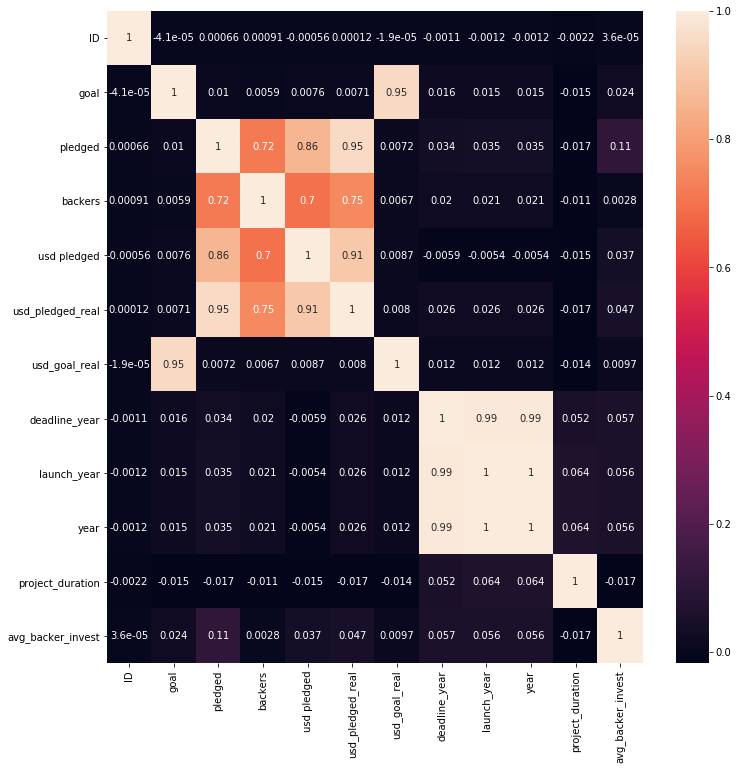

In [35]:
plt.figure(figsize=(12,12))

sns.heatmap(df.corr(), annot=True)

In [36]:
main_catigs = df["main_category"].value_counts()
#separate the data into failed and successful campaigns
main_catigs_failed = df[df["state"] == "failed"]["main_category"].value_counts()
main_catigs_success = df[df["state"] == "successful"]["main_category"].value_counts()

print('Main Successful Categories :')
print (main_catigs_success)

print('Main Not-So- Successful Categories :')
print (main_catigs_failed)

Main Successful Categories :
Music           23808
Film & Video    23229
Games           12059
Publishing      12022
Art             10941
Design          10339
Theater          6480
Technology       6292
Food             5777
Comics           5617
Fashion          5464
Photography      3184
Dance            2325
Crafts           1915
Journalism        971
Name: main_category, dtype: int64
Main Not-So- Successful Categories :
Film & Video    25711
Publishing      17854
Technology      16533
Music           16382
Games           14431
Design          13450
Food            12537
Art             10914
Fashion         10696
Photography      4887
Crafts           4377
Comics           3740
Theater          3053
Journalism       2217
Dance            1026
Name: main_category, dtype: int64


In [42]:
import plotly.graph_objs as go

trace_0 = go.Bar(
    x=main_catigs.index,
    y=main_catigs.values,
    name="Number of Campaigns per Category",
    marker=dict(
        color=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
               27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        
    colorscale='Viridis')
    
)


data = [trace_0]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
fig['layout'].update(showlegend=False, 
                     title="Total number of campaigns on Kickstarter per category since 2009",
                     bargap=0.05)


from plotly.offline import init_notebook_mode, iplot, plot



fig = go.Figure(data=data)
iplot(fig, filename='basic-bar')

TypeError: 'module' object is not callable

In [34]:
X= df.loc[:, df.columns!= 'state'].values
y= df.loc[:, ['state']].values
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 42)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((238461, 15), (79488, 15), (238461, 1), (79488, 1))

In [ ]:
data = df[df['state'].isin(['successful', 'failed'])] # Just working with either successful or failed projects
X = data[['main_category', 'country', 'goal', 'pledged', 'backers']] # Selecting features from data
X = pd.get_dummies(X, columns=['main_category', 'country']) # Converting to dummies for modeling purposes
X = X.as_matrix()

In [41]:
X = np.array(df.drop(['state'],1))
y = np.array(df['state'])

print('Shape X: ', X.shape)
print('Shape y: ', y.shape)

Shape X:  (317949, 19)
Shape y:  (317949,)


In [54]:
from sklearn.preprocessing import Imputer
X = Imputer().fit_transform(X)

C:\Users\Revathy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [50]:
data = df[df['state'].isin(['successful', 'failed'])] # Just working with either successful or failed projects
X = data[['main_category', 'country', 'goal', 'pledged', 'backers']] # Selecting features from data
X = pd.get_dummies(X, columns=['main_category', 'country']) # Converting to dummies for modeling purposes
X = X.as_matrix()
y = data['state'].as_matrix()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

# Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Decision Tree: {}%'.format(accuracy*100))

C:\Users\Revathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\Revathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


Accuracy of Decision Tree: 99.90459008430767%


In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1)
model.fit(X_train, y_train)

log_pred=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(log_pred,y_test))
KNN_acc = metrics.accuracy_score

C:\Users\Revathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.999680808249025


In [62]:
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#learning
model.fit(X_train,y_train)
#KNN Accuracy Prediction
KNN_pred2=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(KNN_pred2,y_test))
KNN_acc = metrics.accuracy_score

Accuracy: 0.999583662933511


In [ ]:
krange = range(100,200)
kscore = []
for k in krange:
    print k

In [72]:
from sklearn.neighbors import KNeighborsClassifier
k_scores=[]
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X, y, cv = 5, scoring = 'accuracy')
k_scores.append(scores.mean())
print (k_scores)

[0.9995732547596013]


In [ ]:
scores.max()